In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN

In [2]:
#namesCol=pd.read_csv('Names.txt',header=None)
df=pd.read_csv('spambase.data')
#df.columns=namesCol
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
df_Spam=pd.pivot_table(df,index=['Spam'])
df_Spam.loc['Diff']=df_Spam.iloc[1]-df_Spam.iloc[0]
df_Spam

,capital_run_length_average,capital_run_length_longest,capital_run_length_total,char_freq_!,char_freq_#,char_freq_$,char_freq_(,char_freq_;,char_freq_[,word_freq_000,...,word_freq_re,word_freq_receive,word_freq_remove,word_freq_report,word_freq_table,word_freq_technology,word_freq_telnet,word_freq_will,word_freq_you,word_freq_your
Spam,,,,,,,,,,,,,,,,,,,,,
0,2.377301,18.214491,161.470947,0.109984,0.021713,0.011648,0.158578,0.050281,0.022684,0.007088,...,0.415760,0.021711,0.009383,0.042403,0.008192,0.141671,0.106033,0.536324,1.270341,0.438702
1,9.519165,104.393271,470.619415,0.513713,0.078877,0.174478,0.108970,0.020573,0.008199,0.247055,...,0.125091,0.118434,0.275405,0.083574,0.001219,0.029515,0.001274,0.549972,2.264539,1.380370
Diff,7.141864,86.178780,309.148468,0.403729,0.057164,0.162830,-0.049608,-0.029708,-0.014485,0.239967,...,-0.290669,0.096723,0.266022,0.041171,-0.006973,-0.112157,-0.104759,0.013649,0.994199,0.941668


In [4]:
df_First17=df.filter(['word_freq_your','word_freq_000','char_freq_$','word_freq_remove','word_freq_you','capital_run_length_total',
                     'word_freq_business','word_freq_receive','word_freq_order','capital_run_length_longest','word_freq_over',
                      'word_freq_free','word_freq_our','char_freq_!','word_freq_addresses','word_freq_email',
                      'word_freq_money'],axis=1)
df_First17

,word_freq_your,word_freq_000,char_freq_$,word_freq_remove,word_freq_you,capital_run_length_total,word_freq_business,word_freq_receive,word_freq_order,capital_run_length_longest,word_freq_over,word_freq_free,word_freq_our,char_freq_!,word_freq_addresses,word_freq_email,word_freq_money
0,0.96,0.00,0.000,0.00,1.93,278,0.00,0.00,0.00,61,0.00,0.32,0.32,0.778,0.00,1.29,0.00
1,1.59,0.43,0.180,0.21,3.47,1028,0.07,0.21,0.00,101,0.28,0.14,0.14,0.372,0.14,0.28,0.43
2,0.51,1.16,0.184,0.19,1.36,2259,0.06,0.38,0.64,485,0.19,0.06,1.23,0.276,1.75,1.03,0.06
3,0.31,0.00,0.000,0.31,3.18,191,0.00,0.31,0.31,40,0.00,0.31,0.63,0.137,0.00,0.00,0.00
4,0.31,0.00,0.000,0.31,3.18,191,0.00,0.31,0.31,40,0.00,0.31,0.63,0.135,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.000,0.00,0.62,88,0.00,0.00,0.00,3,0.31,0.00,0.00,0.000,0.00,0.00,0.00
4597,2.00,0.00,0.000,0.00,6.00,14,0.00,0.00,0.00,4,0.00,0.00,0.00,0.353,0.00,0.00,0.00
4598,0.30,0.00,0.000,0.00,1.50,118,0.00,0.00,0.00,6,0.00,0.00,0.00,0.000,0.00,0.90,0.00
4599,0.32,0.00,0.000,0.00,1.93,78,0.00,0.00,0.00,5,0.00,0.00,0.32,0.000,0.00,0.00,0.00


In [5]:
df_First22=df.filter(['word_freq_your','word_freq_000','char_freq_$','word_freq_remove','word_freq_you','capital_run_length_total',
                     'word_freq_business','word_freq_receive','word_freq_order','capital_run_length_longest','word_freq_over',
                      'word_freq_free','word_freq_our','char_freq_!','word_freq_addresses','word_freq_email',
                      'word_freq_money','word_freq_all','word_freq_internet','word_freq_credit','word_freq_mail',
                     'word_freq_make'],axis=1)
df_First22

,word_freq_your,word_freq_000,char_freq_$,word_freq_remove,word_freq_you,capital_run_length_total,word_freq_business,word_freq_receive,word_freq_order,capital_run_length_longest,...,word_freq_our,char_freq_!,word_freq_addresses,word_freq_email,word_freq_money,word_freq_all,word_freq_internet,word_freq_credit,word_freq_mail,word_freq_make
0,0.96,0.00,0.000,0.00,1.93,278,0.00,0.00,0.00,61,...,0.32,0.778,0.00,1.29,0.00,0.64,0.00,0.00,0.00,0.00
1,1.59,0.43,0.180,0.21,3.47,1028,0.07,0.21,0.00,101,...,0.14,0.372,0.14,0.28,0.43,0.50,0.07,0.00,0.94,0.21
2,0.51,1.16,0.184,0.19,1.36,2259,0.06,0.38,0.64,485,...,1.23,0.276,1.75,1.03,0.06,0.71,0.12,0.32,0.25,0.06
3,0.31,0.00,0.000,0.31,3.18,191,0.00,0.31,0.31,40,...,0.63,0.137,0.00,0.00,0.00,0.00,0.63,0.00,0.63,0.00
4,0.31,0.00,0.000,0.31,3.18,191,0.00,0.31,0.31,40,...,0.63,0.135,0.00,0.00,0.00,0.00,0.63,0.00,0.63,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.000,0.00,0.62,88,0.00,0.00,0.00,3,...,0.00,0.000,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.31
4597,2.00,0.00,0.000,0.00,6.00,14,0.00,0.00,0.00,4,...,0.00,0.353,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4598,0.30,0.00,0.000,0.00,1.50,118,0.00,0.00,0.00,6,...,0.00,0.000,0.00,0.90,0.00,0.30,0.00,0.00,0.00,0.30
4599,0.32,0.00,0.000,0.00,1.93,78,0.00,0.00,0.00,5,...,0.32,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.96


In [6]:
#légèrement moins bon
df_10_Best_And_Worse=df.filter(['word_freq_your','word_freq_000','char_freq_$','word_freq_remove','word_freq_you','capital_run_length_total',
                                 'word_freq_business','word_freq_receive','word_freq_order','capital_run_length_longest',
                               'word_freq_george','word_freq_1999','word_freq_hp','word_freq_edu','word_freq_hpl',
                               'word_freq_re','word_freq_meeting','word_freq_original','word_freq_data','word_freq_pm'],axis=1)
df_10_Best_And_Worse

,word_freq_your,word_freq_000,char_freq_$,word_freq_remove,word_freq_you,capital_run_length_total,word_freq_business,word_freq_receive,word_freq_order,capital_run_length_longest,word_freq_george,word_freq_1999,word_freq_hp,word_freq_edu,word_freq_hpl,word_freq_re,word_freq_meeting,word_freq_original,word_freq_data,word_freq_pm
0,0.96,0.00,0.000,0.00,1.93,278,0.00,0.00,0.00,61,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
1,1.59,0.43,0.180,0.21,3.47,1028,0.07,0.21,0.00,101,0.0,0.07,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
2,0.51,1.16,0.184,0.19,1.36,2259,0.06,0.38,0.64,485,0.0,0.00,0.0,0.06,0.0,0.06,0.0,0.12,0.0,0.0
3,0.31,0.00,0.000,0.31,3.18,191,0.00,0.31,0.31,40,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
4,0.31,0.00,0.000,0.31,3.18,191,0.00,0.31,0.31,40,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.000,0.00,0.62,88,0.00,0.00,0.00,3,0.0,0.00,0.0,0.31,0.0,0.31,0.0,0.00,0.0,0.0
4597,2.00,0.00,0.000,0.00,6.00,14,0.00,0.00,0.00,4,0.0,0.00,0.0,2.00,0.0,0.00,0.0,0.00,0.0,0.0
4598,0.30,0.00,0.000,0.00,1.50,118,0.00,0.00,0.00,6,0.0,0.00,0.0,1.20,0.0,0.00,0.0,0.00,0.0,0.0
4599,0.32,0.00,0.000,0.00,1.93,78,0.00,0.00,0.00,5,0.0,0.00,0.0,0.32,0.0,0.00,0.0,0.00,0.0,0.0


In [7]:
X = df
X = X.drop('Spam',1)
Y = df['Spam']
X.shape, Y.shape

<ipython-input-7-9faa4e6fc020>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = X.drop('Spam',1)


((4601, 57), (4601,))

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

In [9]:
scaler=StandardScaler()
scaler.fit(X_train) #on filtre uniquement sur les data d'entrainement
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test) #pareille transformation sur les data test

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)
Y_test = pd.DataFrame(Y_test)
len(X_train.columns)

57

In [10]:
X_first = X_test.head(1)
Y_first = Y_test.head(1)

X_first, Y_first

(         0         1         2        3         4         5         6   \
 0 -0.342388 -0.165331 -0.130005 -0.04069  0.528196 -0.352837 -0.286875   
 
          7         8         9   ...       47        48        49        50  \
 0 -0.255384  1.298714 -0.411261  ... -0.13014 -0.157785 -0.609542 -0.147214   
 
          51        52        53        54        55        56  
 0  0.038274 -0.300706 -0.100306 -0.103662 -0.022533 -0.190027  
 
 [1 rows x 57 columns],
      Spam
 737     1)

In [11]:

svc=svm.SVC(kernel='linear')
cross_val_score(svc,X_train,Y_train,n_jobs=1)

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

array([0.91410049, 0.93030794, 0.93019481, 0.91883117, 0.92532468])

In [12]:
parameters={'gamma':[0.01,0.1,0.5]}
grid=GridSearchCV(svm.SVC(),parameters,n_jobs=-1,cv=5)
grid.fit(X_train,Y_train)
print(grid.best_score_,grid.best_estimator_)

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9269938327474794 SVC(gamma=0.01)


In [13]:
parameters={'C':[1.5,2,2.5],
           'kernel':['rbf','poly','sigmoid'],
           'gamma':[0.05,0.1,0.15]}
grid=GridSearchCV(svm.SVC(),parameters,n_jobs=-1)
grid.fit(X_train,Y_train)
print(grid.best_score_,grid.best_estimator_)

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9266691574228041 SVC(C=2.5, gamma=0.05)


In [14]:
parameters={'C':[2.5,3,4],
           'kernel':['rbf','poly','sigmoid'],
           'gamma':[0.05,0.1,0.15],
           "degree":[1,3,5]}
grid=GridSearchCV(svm.SVC(),parameters,n_jobs=-1)
grid.fit(X_train,Y_train)
print(grid.best_score_,grid.best_estimator_)

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9273174556399841 SVC(C=3, degree=1, gamma=0.05)


In [15]:
parameters={'C':[4,5,6,7],
           'kernel':['rbf'],
           'gamma':[0.03,0.05,0.07],
           "degree":[1,2,3]}
grid=GridSearchCV(svm.SVC(),parameters,n_jobs=-1)
grid.fit(X_train,Y_train)
print(grid.best_score_,grid.best_estimator_)

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9308862531309856 SVC(C=4, degree=1, gamma=0.03)


In [13]:
def test_hyperparametres(hyperparametres):
    grid=GridSearchCV(svm.SVC(),hyperparametres,n_jobs=-1)
    grid.fit(X_train,Y_train)
    print(grid.best_score_,grid.best_estimator_)
    return grid.best_score_,grid.best_estimator_

In [14]:
def test_hyperparametresWAlgo(algo,hyperparametres):
    grid=GridSearchCV(algo,hyperparametres,n_jobs=-1)
    grid.fit(X_train,Y_train)
    print(grid.best_score_,grid.best_estimator_)
    return grid.best_score_,grid.best_estimator_

In [18]:
algo=LogisticRegression()
paramLogic={"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           "penalty":[ 'l2'],
           "C":[100, 10, 1.0, 0.1, 0.01]}
test_hyperparametresWAlgo(algo,paramLogic)

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9234266139047339 LogisticRegression(C=100, solver='newton-cg')


(0.9234266139047339, LogisticRegression(C=100, solver='newton-cg'))

In [24]:
#Resultat avec df_10_Best_And_Worse
X = df_10_Best_And_Worse
Y = df['Spam']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
scaler=StandardScaler()
scaler.fit(X_train) #on filtre uniquement sur les data d'entrainement
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
model=SVC()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("Score :",model.score(X_train, Y_train))
print(classification_report(Y_test,prediction))
print(confusion_matrix(Y_test, prediction))

Score : 0.9094743672939649
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       919
           1       0.93      0.81      0.87       600

    accuracy                           0.90      1519
   macro avg       0.91      0.89      0.89      1519
weighted avg       0.90      0.90      0.90      1519

[[881  38]
 [111 489]]


In [25]:
#Résultats avec df_First22
X = df_First22
Y = df['Spam']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
scaler=StandardScaler()
scaler.fit(X_train) #on filtre uniquement sur les data d'entrainement
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
model=SVC()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("Score :",model.score(X_train, Y_train))
print(classification_report(Y_test,prediction))
print(confusion_matrix(Y_test, prediction))

Score : 0.9279688513951979
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       914
           1       0.94      0.85      0.89       605

    accuracy                           0.92      1519
   macro avg       0.92      0.90      0.91      1519
weighted avg       0.92      0.92      0.92      1519

[[879  35]
 [ 92 513]]


In [26]:
#Résultats avec df_First17
X = df_First17
Y = df['Spam']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
scaler=StandardScaler()
scaler.fit(X_train) #on filtre uniquement sur les data d'entrainement
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
model=SVC()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("Score :",model.score(X_train, Y_train))
print(classification_report(Y_test,prediction))
print(confusion_matrix(Y_test, prediction))

Score : 0.9247242050616483
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       915
           1       0.91      0.84      0.87       604

    accuracy                           0.90      1519
   macro avg       0.90      0.89      0.90      1519
weighted avg       0.90      0.90      0.90      1519

[[862  53]
 [ 95 509]]


In [27]:
#Résultats avec df (toutes les colonnes) 
X = df
X=X.drop('Spam',1)
Y = df['Spam']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
scaler=StandardScaler()
scaler.fit(X_train) #on filtre uniquement sur les data d'entrainement
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
model=SVC()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("Score :",model.score(X_train, Y_train))
print(classification_report(Y_test,prediction))
print(confusion_matrix(Y_test, prediction))

<ipython-input-27-a9f96b54be5b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop('Spam',1)


Score : 0.945489941596366
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       915
           1       0.93      0.90      0.92       604

    accuracy                           0.93      1519
   macro avg       0.93      0.93      0.93      1519
weighted avg       0.93      0.93      0.93      1519

[[876  39]
 [ 60 544]]


# Test KNN

In [28]:
model = KNeighborsClassifier( n_neighbors=5)

In [29]:
#Résultats avec df (toutes les colonnes) 
X = df
X=X.drop('Spam',1)
Y = df['Spam']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
scaler=StandardScaler()
scaler.fit(X_train) #on filtre uniquement sur les data d'entrainement
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
model=SVC()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("Score :",model.score(X_train, Y_train))
print(classification_report(Y_test,prediction))
print(confusion_matrix(Y_test, prediction))

<ipython-input-29-a9f96b54be5b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop('Spam',1)


Score : 0.9532770927968851
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       913
           1       0.92      0.87      0.89       606

    accuracy                           0.92      1519
   macro avg       0.92      0.91      0.91      1519
weighted avg       0.92      0.92      0.92      1519

[[864  49]
 [ 77 529]]


<ipython-input-35-82514ac72273>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfPred=pd.DataFrame(X_train,columns=df.drop('Spam',1).columns)


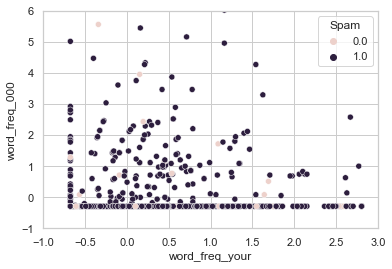

In [35]:
listTrue=Y_test.tolist()
listPred=prediction
listFin=[]
for i in range(len(listTrue)):
    if(listTrue[i]==listPred[i]):
        listFin.append(True)
    else:
        listFin.append(False)
dfWithoutSpam=df
dfPred=pd.DataFrame(X_train,columns=df.drop('Spam',1).columns)
dfPred['Spam']=pd.DataFrame(listFin)
sns.set(style='whitegrid')
sns.scatterplot(x="word_freq_your",
                    y="word_freq_000",
                    data=dfPred,
                    hue="Spam",sizes=(400, 400))
plt.ylim(-1, 6)
plt.xlim(-1, 3)

plt.show()

In [30]:
#Résultats avec df_First17
X = df_First17
Y = df['Spam']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
scaler=StandardScaler()
scaler.fit(X_train) #on filtre uniquement sur les data d'entrainement
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
model=SVC()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("Score :",model.score(X_train, Y_train))
print(classification_report(Y_test,prediction))
print(confusion_matrix(Y_test, prediction))

Score : 0.9240752757949383
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       914
           1       0.90      0.88      0.89       605

    accuracy                           0.91      1519
   macro avg       0.91      0.91      0.91      1519
weighted avg       0.91      0.91      0.91      1519

[[856  58]
 [ 74 531]]


<ipython-input-36-82514ac72273>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfPred=pd.DataFrame(X_train,columns=df.drop('Spam',1).columns)


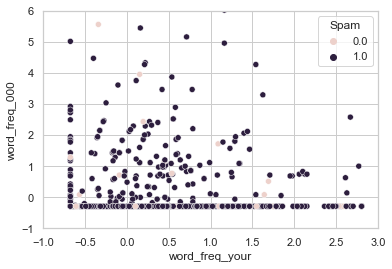

In [36]:
listTrue=Y_test.tolist()
listPred=prediction
listFin=[]
for i in range(len(listTrue)):
    if(listTrue[i]==listPred[i]):
        listFin.append(True)
    else:
        listFin.append(False)
dfWithoutSpam=df
dfPred=pd.DataFrame(X_train,columns=df.drop('Spam',1).columns)
dfPred['Spam']=pd.DataFrame(listFin)
sns.set(style='whitegrid')
sns.scatterplot(x="word_freq_your",
                    y="word_freq_000",
                    data=dfPred,
                    hue="Spam",sizes=(400, 400))
plt.ylim(-1, 6)
plt.xlim(-1, 3)

plt.show()

In [31]:
#Résultats avec df_First22
X = df_First22
Y = df['Spam']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
scaler=StandardScaler()
scaler.fit(X_train) #on filtre uniquement sur les data d'entrainement
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
model=SVC()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("Score :",model.score(X_train, Y_train))
print(classification_report(Y_test,prediction))
print(confusion_matrix(Y_test, prediction))

Score : 0.9279688513951979
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       949
           1       0.89      0.87      0.88       570

    accuracy                           0.91      1519
   macro avg       0.91      0.90      0.91      1519
weighted avg       0.91      0.91      0.91      1519

[[890  59]
 [ 73 497]]


<ipython-input-37-82514ac72273>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfPred=pd.DataFrame(X_train,columns=df.drop('Spam',1).columns)


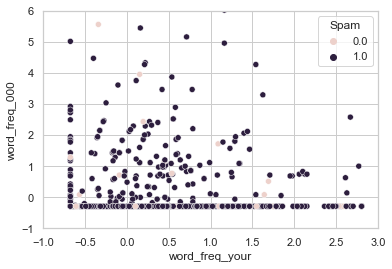

In [37]:
listTrue=Y_test.tolist()
listPred=prediction
listFin=[]
for i in range(len(listTrue)):
    if(listTrue[i]==listPred[i]):
        listFin.append(True)
    else:
        listFin.append(False)
dfWithoutSpam=df
dfPred=pd.DataFrame(X_train,columns=df.drop('Spam',1).columns)
dfPred['Spam']=pd.DataFrame(listFin)
sns.set(style='whitegrid')
sns.scatterplot(x="word_freq_your",
                    y="word_freq_000",
                    data=dfPred,
                    hue="Spam",sizes=(400, 400))
plt.ylim(-1, 6)
plt.xlim(-1, 3)

plt.show()

In [32]:
#Résultats avec df_10_Best_And_Worse
X =df_10_Best_And_Worse
Y = df['Spam']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
scaler=StandardScaler()
scaler.fit(X_train) #on filtre uniquement sur les data d'entrainement
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
model=SVC()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print("Score :",model.score(X_train, Y_train))
print(classification_report(Y_test,prediction))
print(confusion_matrix(Y_test, prediction))

Score : 0.9039584685269305
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       900
           1       0.93      0.80      0.86       619

    accuracy                           0.89      1519
   macro avg       0.90      0.88      0.89      1519
weighted avg       0.90      0.89      0.89      1519

[[861  39]
 [121 498]]


<ipython-input-38-82514ac72273>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfPred=pd.DataFrame(X_train,columns=df.drop('Spam',1).columns)


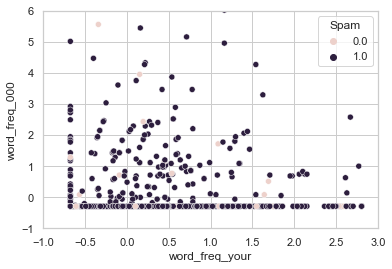

In [38]:
listTrue=Y_test.tolist()
listPred=prediction
listFin=[]
for i in range(len(listTrue)):
    if(listTrue[i]==listPred[i]):
        listFin.append(True)
    else:
        listFin.append(False)
dfWithoutSpam=df
dfPred=pd.DataFrame(X_train,columns=df.drop('Spam',1).columns)
dfPred['Spam']=pd.DataFrame(listFin)
sns.set(style='whitegrid')
sns.scatterplot(x="word_freq_your",
                    y="word_freq_000",
                    data=dfPred,
                    hue="Spam",sizes=(400, 400))
plt.ylim(-1, 6)
plt.xlim(-1, 3)

plt.show()

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y

<Figure size 432x288 with 0 Axes>

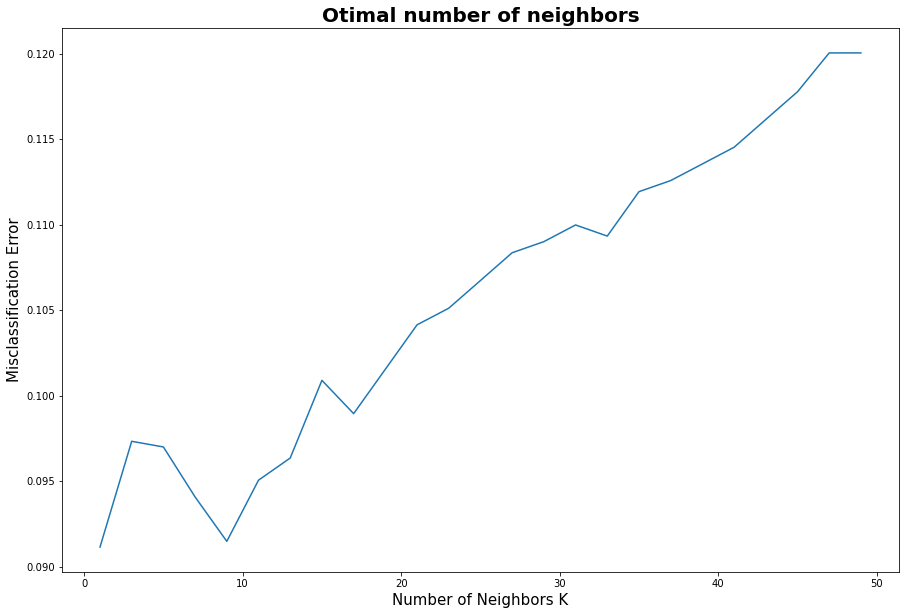

In [10]:
knn_results=[]
k_test = list(range(1,50,2))
for k in k_test:
    model_test = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model_test, X_train, Y_train, cv=10, scoring='accuracy')
    knn_results.append(scores.mean())
MSE = [1 - x for x in knn_results]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Otimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
plt.plot(k_test, MSE)

plt.show()

In [ ]:
Meilleur résultat obtenu avec nb_neighbors =9

In [18]:
model=KNeighborsClassifier()

# Change in leaf_size because it has to be as least 1

parameters = {
    "n_neighbors" : [9],
    "weights" : ['uniform', 'distance'],
    "algorithm" : ['auto','ball_tree','kd_tree','brute'],
    "leaf_size" : [i for i in range(1,100)],
    "p" : [1,2]
}

test_hyperparametresWAlgo(model,parameters)

0.9214785619566819 KNeighborsClassifier(leaf_size=1, n_neighbors=9, weights='distance')


C:\Users\seraf\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


(0.9214785619566819,
 KNeighborsClassifier(leaf_size=1, n_neighbors=9, weights='distance'))

### Execute the model 50 times with different splits to see results with variance

In [33]:
model = KNeighborsClassifier(leaf_size=1, n_neighbors=9, p=1, weights='distance')
X = df
X=X.drop('Spam',1)
Y = df['Spam']
for i in range(50):

    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
    scaler=StandardScaler()
    scaler.fit(X_train) #on filtre uniquement sur les data d'entrainement
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test) #pareille transformation sur les data test
    model.fit(X_train, Y_train)
    
    print("_____ Model " + str(i) + " _____")
    print("Score :",model.score(X_train, Y_train))
    prediction = model.predict(X_test)
    print(classification_report(Y_test,prediction))
    print(confusion_matrix(Y_test, prediction))

<ipython-input-33-278479761d70>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=X.drop('Spam',1)


_____ Model 0 _____
Score : 0.9993510707332901
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       917
           1       0.94      0.85      0.89       602

    accuracy                           0.92      1519
   macro avg       0.93      0.91      0.92      1519
weighted avg       0.92      0.92      0.92      1519

[[887  30]
 [ 91 511]]
_____ Model 1 _____
Score : 0.999675535366645
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       970
           1       0.93      0.85      0.89       549

    accuracy                           0.92      1519
   macro avg       0.92      0.91      0.91      1519
weighted avg       0.92      0.92      0.92      1519

[[934  36]
 [ 81 468]]
_____ Model 2 _____
Score : 0.999675535366645
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       940
           1       0.95      0.86      0.90       57

Score : 0.9993510707332901
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       921
           1       0.94      0.86      0.90       598

    accuracy                           0.92      1519
   macro avg       0.93      0.91      0.92      1519
weighted avg       0.92      0.92      0.92      1519

[[886  35]
 [ 81 517]]
_____ Model 22 _____
Score : 0.9993510707332901
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       937
           1       0.93      0.87      0.90       582

    accuracy                           0.93      1519
   macro avg       0.93      0.92      0.92      1519
weighted avg       0.93      0.93      0.93      1519

[[900  37]
 [ 75 507]]
_____ Model 23 _____
Score : 0.9990266060999351
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       924
           1       0.94      0.85      0.90       595

    accuracy 

Score : 0.999675535366645
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       915
           1       0.94      0.82      0.88       604

    accuracy                           0.91      1519
   macro avg       0.92      0.89      0.90      1519
weighted avg       0.91      0.91      0.91      1519

[[884  31]
 [110 494]]
_____ Model 43 _____
Score : 0.999675535366645
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       900
           1       0.97      0.80      0.88       619

    accuracy                           0.91      1519
   macro avg       0.92      0.89      0.90      1519
weighted avg       0.91      0.91      0.91      1519

[[883  17]
 [123 496]]
_____ Model 44 _____
Score : 0.9993510707332901
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       918
           1       0.93      0.89      0.91       601

    accuracy   

# SAVE THE MODEL

In [39]:
import pickle

with open('model_spam.pickle','wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
model = pickle.load(open('model_spam.pickle','rb'))
print(model.score(X_test,Y_test))

0.9210006583278473


In [42]:
model = KNeighborsClassifier(leaf_size=1, n_neighbors=9, p=1, weights='distance')